In [143]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install -U scikit-learn

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans,AgglomerativeClustering

# Load data
data=pd.read_csv('C:\\Users\\Thamer\\Downloads\\HR_comma_sep.csv')
# showing 10 random samples
data.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
1787,0.45,0.57,2,138,3,0,1,0,hr,medium
1781,0.44,0.51,2,135,3,0,1,0,sales,medium
536,0.11,0.85,6,305,4,0,1,0,accounting,medium
13604,0.33,0.97,5,130,4,0,0,0,management,high
780,0.44,0.65,3,271,4,0,1,0,sales,low
6621,0.92,0.83,5,270,3,0,0,0,technical,low
14040,0.64,0.67,4,252,3,1,0,0,sales,medium
9515,0.54,0.46,2,98,4,0,0,0,support,low
1987,0.84,0.84,5,238,5,0,1,0,support,medium
9703,0.47,0.40,3,113,3,0,0,0,marketing,high


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


 Using this command we can get info about our data set that we have 14999 sample and 10 attributes with no-null values

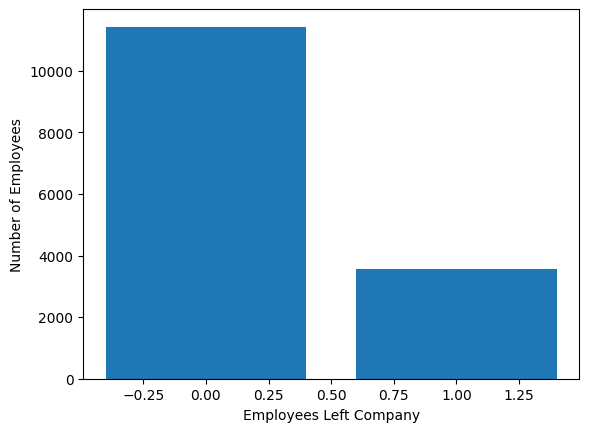

In [146]:
left_count=data.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

In this graph, we can see that close to 4000 of employes have left the company.
And we will try to analyze the data to see what are the reasons behind it.

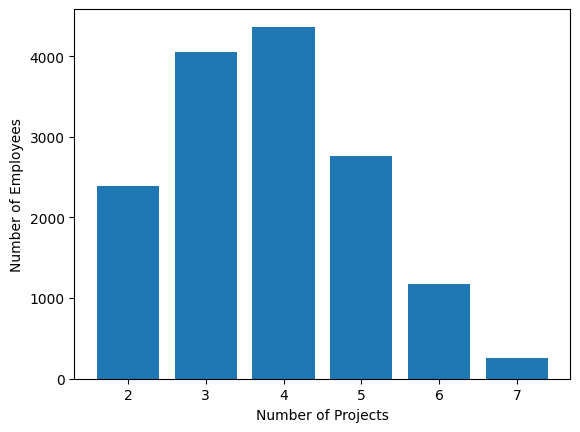

In [147]:
num_projects=data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

- We can see that most of employes are doing between 3-4 projects.
- This can be a reason behind why they left the company due to intense work hours for these projets. 

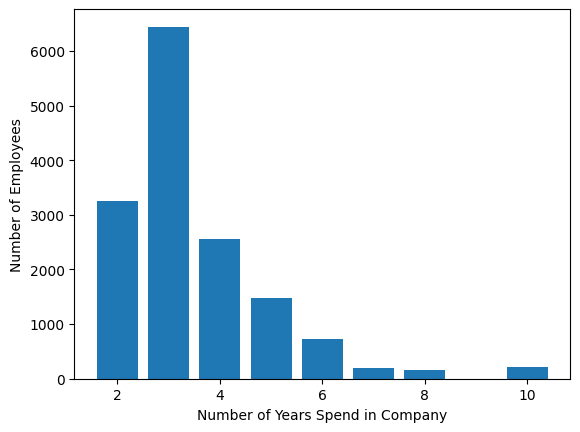

In [148]:
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

- We can see that most of employes are 3 to 4 years experience.
- Either employes with high years experince are leaving because there is no promotion or low experince employes are leaving because of low salary and - - better offers from other companies.

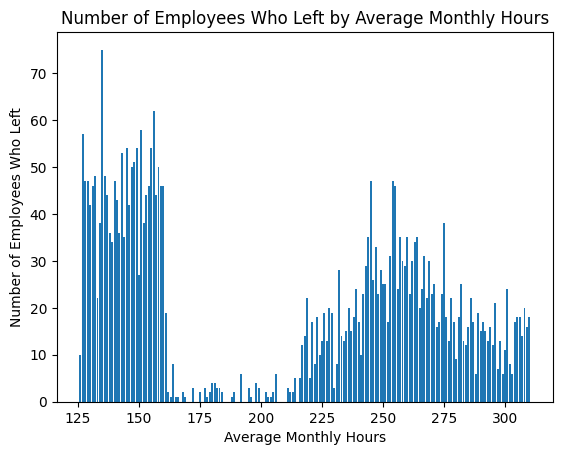

In [149]:
left_data = data[data['left'] == 1]
left_count = left_data.groupby('average_montly_hours').size().reset_index(name='count')
plt.bar(left_count['average_montly_hours'], left_count['count'])
plt.xlabel('Average Monthly Hours')
plt.ylabel('Number of Employees Who Left')
plt.title('Number of Employees Who Left by Average Monthly Hours')
plt.show()

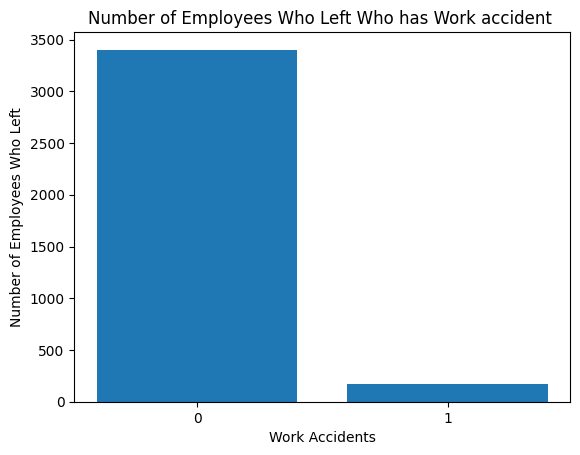

In [150]:
# Figuring is there a relation between leaving and work accident.

# We grouping left employees by there Work_accident.
left_accident_account = left_data.groupby('Work_accident').size().reset_index(name='left_accident_account ')

# Create a bar plot to visualize the result.
plt.bar(left_accident_account ['Work_accident'], left_accident_account ['left_accident_account '])
plt.xlabel('Work Accidents')
plt.ylabel('Number of Employees Who Left')
plt.title('Number of Employees Who Left Who has Work accident ')
plt.xticks([0, 1], ['0', '1'])
plt.show()

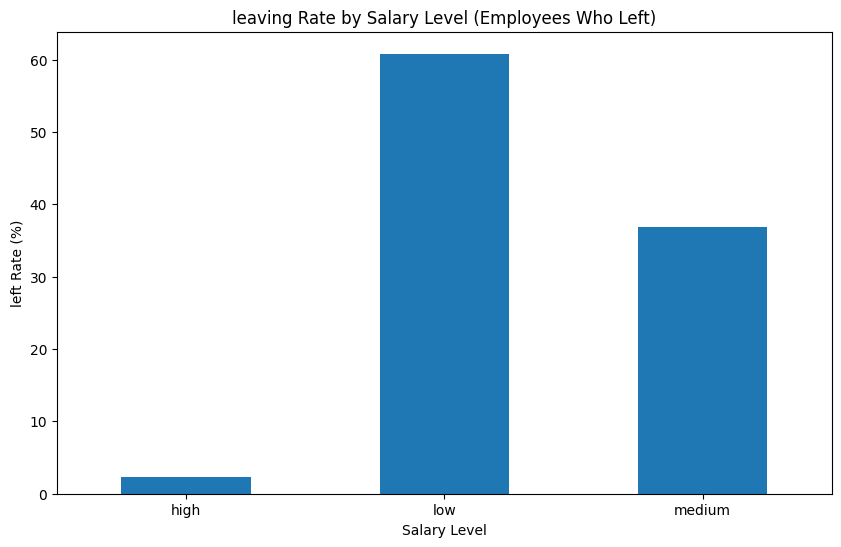

In [151]:
# Rate of data by grouping salary level for those who left 
turnover_rate_by_salary = left_data.groupby('salary')['left'].count() / len(left_data) * 100

# Plotting the bar plot
turnover_rate_by_salary.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Salary Level')
plt.ylabel('left Rate (%)')
plt.title('leaving Rate by Salary Level (Employees Who Left)')
plt.xticks(rotation=0)
plt.show()

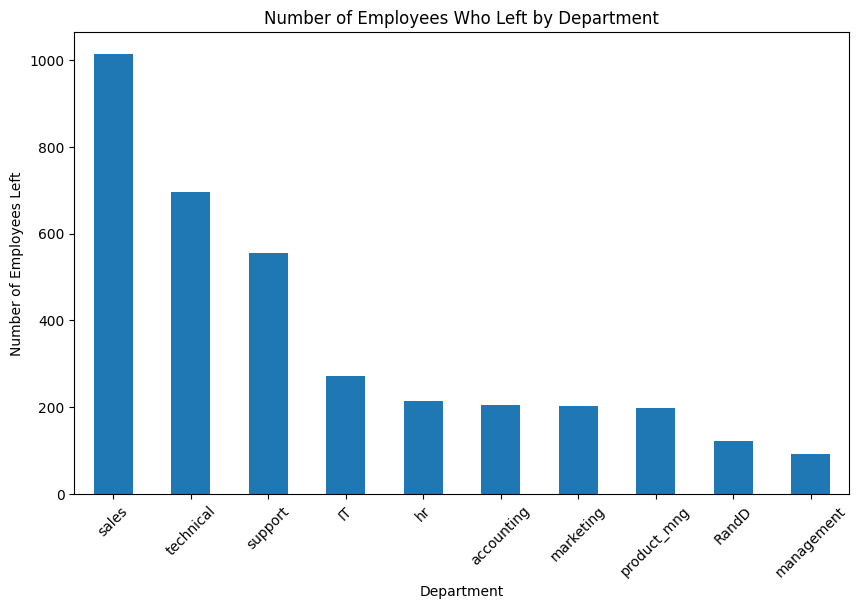

In [152]:
# Count the number of employees who left by department
turnover_by_department = left_data['sales'].value_counts()

# Plotting the bar plot
turnover_by_department.plot(kind='bar',figsize=(10, 6))
plt.xlabel('Department')
plt.ylabel('Number of Employees Left')
plt.title('Number of Employees Who Left by Department')
plt.xticks(rotation=45)
plt.show()

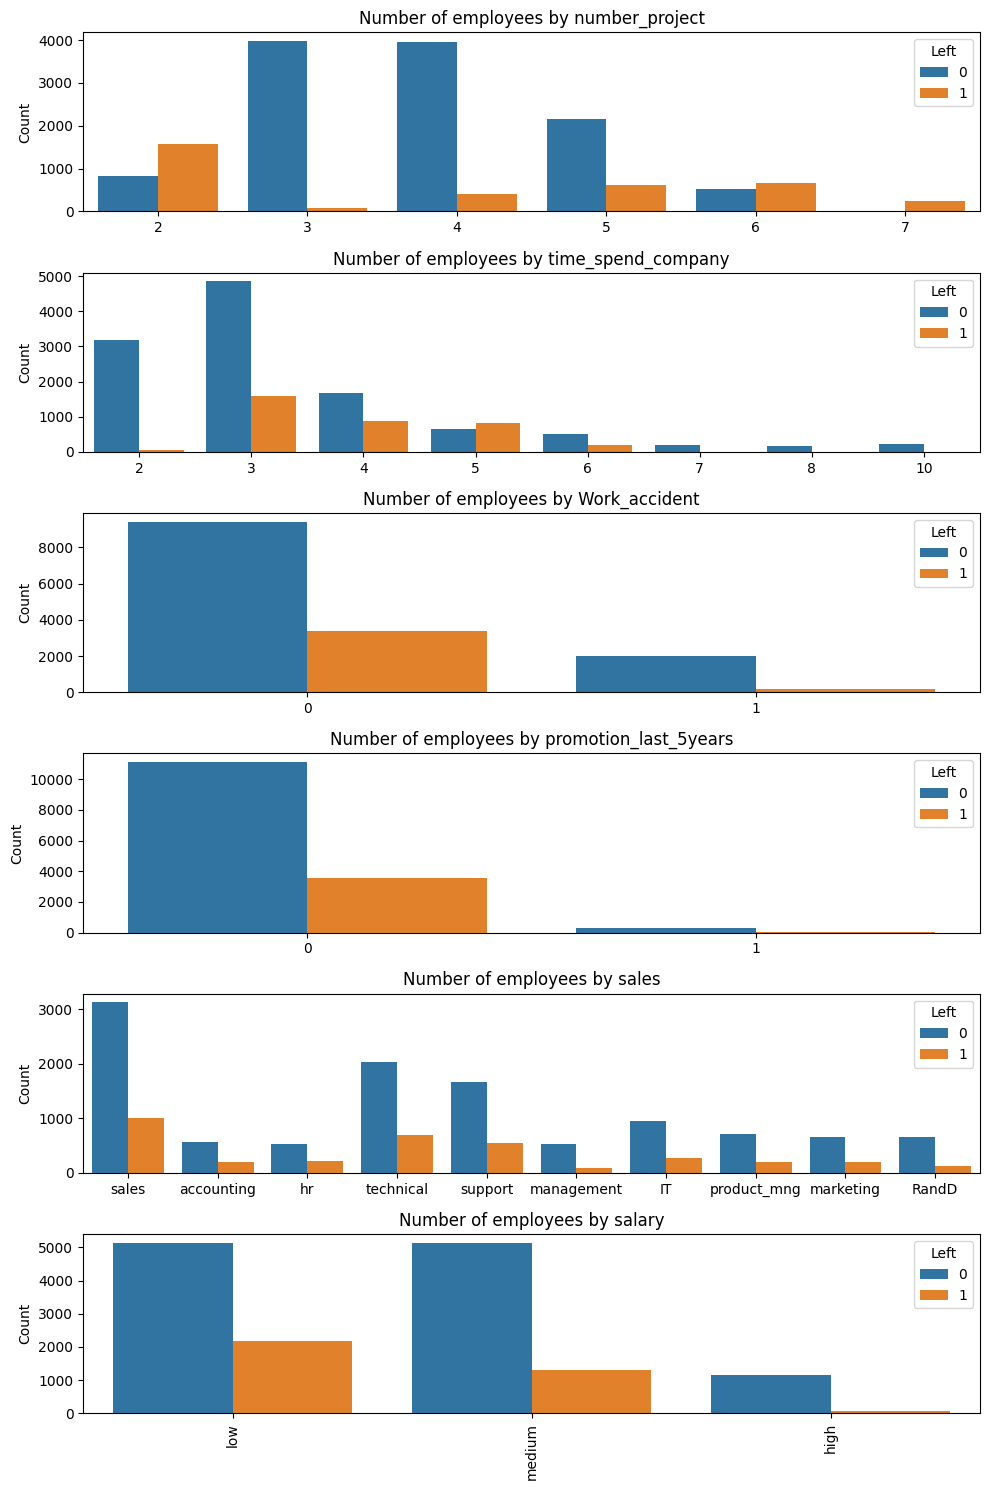

In [153]:
# Specify the features to plot
features = ['number_project', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales', 'salary']

# Create a figure and set the size
fig, axes = plt.subplots(len(features), 1, figsize=(10, 15))  # Create a subplot for each feature

# Loop through each feature and create a count plot
for i, feature in enumerate(features):
    sns.countplot(x=feature, data=data, hue='left', ax=axes[i])
    axes[i].set_title(f'Number of employees by {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Left', loc='upper right')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Adjust layout to prevent overlap
plt.tight_layout()

In [154]:
# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['sales']=le.fit_transform(data['sales'])

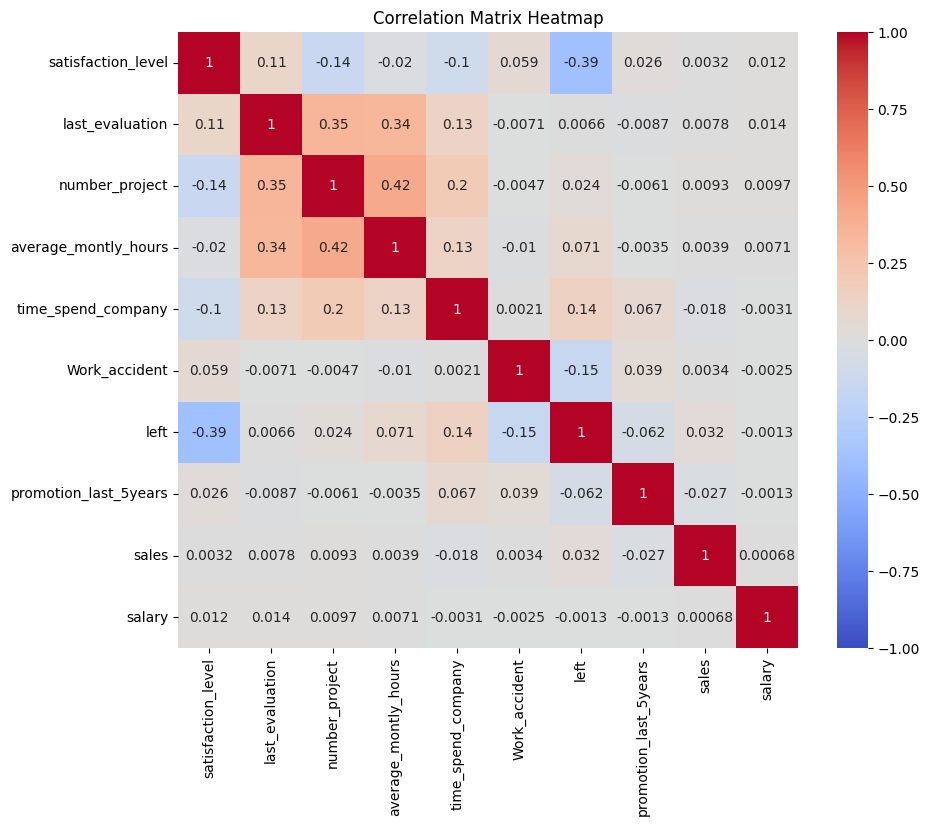

In [155]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

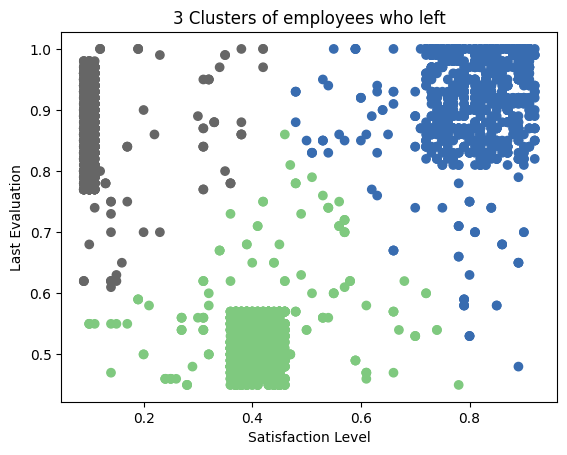

In [156]:
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]

# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_

# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

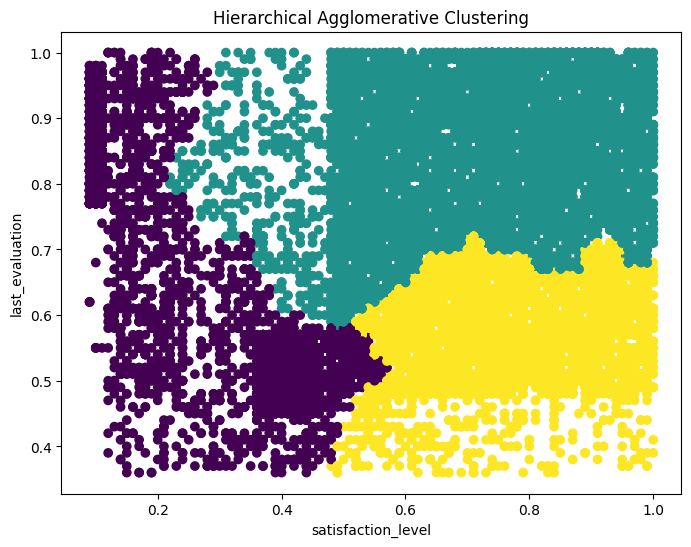

In [161]:

X = data[['satisfaction_level', 'last_evaluation']].values

# Applying Hierarchical Agglomerative Clustering
hac = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Assuming 3 clusters and Ward linkage
labels = hac.fit_predict(X)

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Hierarchical Agglomerative Clustering')
plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')
plt.show()

In [ ]:
# Filter data
left_emp =  data[['number_project', 'average_montly_hours']][data.left == 1]

# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_

# Draw scatter plot
plt.scatter(left_emp['number_project'], left_emp['average_montly_hours'], c=left_emp['label'],cmap='Accent')
plt.xlabel('number_project')
plt.ylabel('average_monthly_hours')
plt.title('3 Clusters of employees who left')
plt.show()

In [ ]:
# Spliting data into Feature and
X=data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales', 'salary']]
y=data['left']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [ ]:
# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)

In [ ]:
# Make prediction on test dataset
ypred=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, ypred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, ypred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, ypred))

#Model F1-Score
print("F-Score:",metrics.f1_score(y_test, ypred))

"""
We achieved a classification rate of 93%, which is considered a high level of Accuracy.

Precision: Precision refers to the level of accuracy or exactness exhibited by our model.
Put simply, it measures how often our model's predictions are correct.

Recall: If there is an employee who actually left present in the test set and our Back Propagation model is able to identify it 91% of the time.

F-score: closer to 1 indicates better model performance, while a score closer to 0 suggests poor performance. our F-score of 0.876 indicates that the model has achieved a good balance between precision and recall, which is generally desirable.

"""

In [162]:
"""
GradientBoostingClassifier, a classifier in ensemble learning, excels in accuracy and fights overfitting. 
Widely used in finance, healthcare, and natural language processing for its effectiveness with complex datasets and accurate predictions.

"""
#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

In [163]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F1-Score
print("F-Score:",metrics.f1_score(y_test, y_pred))

"""
We achieved a classification rate of 97%, which is considered a high level of Accuracy.
"""

Accuracy: 0.9713333333333334
Precision: 0.9573229873908826
Recall: 0.9207089552238806
F-Score: 0.9386590584878745


'\nWe achieved a classification rate of 97%, which is considered a high level of Accuracy.\n'